In [181]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [62]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [6]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [7]:
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [16]:
maxi = avocado_mean.rolling(3).mean().max()#.round(2)
maxi = '{:.3}'.format(maxi)
maxi


'1.85'

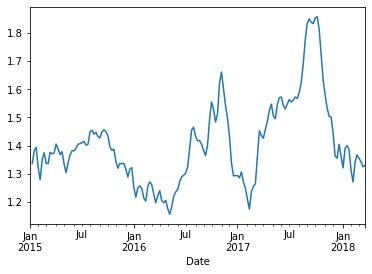

In [18]:
ax = avocado_mean.rolling(2).mean().plot()

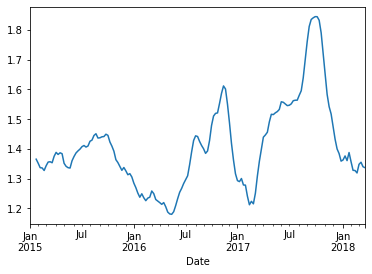

In [19]:
ax = avocado_mean.rolling(4).mean().plot()

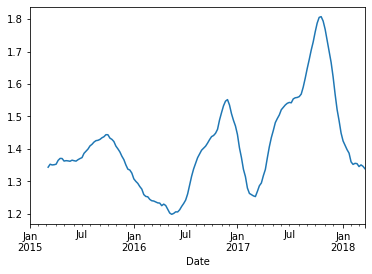

In [20]:
ax = avocado_mean.rolling(10).mean().plot()

In [26]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

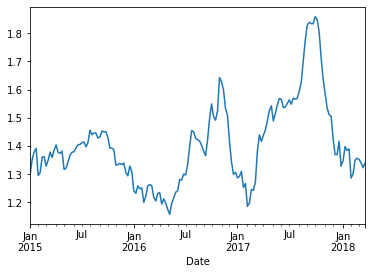

In [27]:
ax = avocado_ewm.plot()

In [75]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_full.csv",
                           index_col=0, parse_dates=['Date'])

In [76]:
avocado_mean

AveragePrice  Total Volume        4046       4225       4770  \
Date                                                                       
2015-01-04          1.75      27365.89     9307.34    3844.81     615.28   
2015-01-04          1.49      17723.17     1189.35   15628.27       0.00   
2015-01-04          1.68       2896.72      161.68     206.96       0.00   
2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70   
2015-01-04          1.64       1505.12        1.27    1129.50       0.00   
...                  ...           ...         ...        ...        ...   
2018-03-25          1.36     908202.13   142681.06  463136.28  174975.75   
2018-03-25          0.70    9010588.32  3999735.71  966589.50   30130.82   
2018-03-25          1.42     163496.70    29253.30    5080.04       0.00   
2018-03-25          1.70     190257.38    29644.09   70982.10       0.00   
2018-03-25          1.34    1774776.77    63905.98  908653.71     843.45   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36         0.00       organic   
2015-01-04      905.55      905.55        0.00         0.00       organic   
2015-01-04     2528.08     2528.08        0.00         0.00       organic   
2015-01-04    14925.18    11264.80     3660.38         0.00  conventional   
2015-01-04      374.35      186.67      187.68         0.00       organic   
...                ...         ...         ...          ...           ...   
2018-03-25   127409.04   103579.41    22467.04      1362.59  conventional   
2018-03-25  4014132.29  3398569.92   546409.74     69152.63  conventional   
2018-03-25   129163.36   109052.26    20111.10         0.00       organic   
2018-03-25    89631.19    89424.11      207.08         0.00       organic   
2018-03-25   801373.63   774634.09    23833.93      2905.61  conventional   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise  
...          ...                 ...  
2018-03-25  2018             Chicago  
2018-03-25  2018        SouthCentral  
2018-03-25  2018        SouthCentral  
2018-03-25  2018          California  
2018-03-25  2018             NewYork  

[18249 rows x 12 columns]

In [77]:
avocado_mean_in_Ch = avocado_mean[(avocado_mean.region == 'Chicago') & (avocado_mean.type == 'organic')]

In [78]:
avocado_mean_in_Ch['avocado_mean_in_Ch_ewm'] =  avocado_mean_in_Ch.AveragePrice.ewm(span=4).mean()
avocado_mean_in_Ch['avocado_mean_in_Ch_rol'] =  avocado_mean_in_Ch.AveragePrice.rolling(4).mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


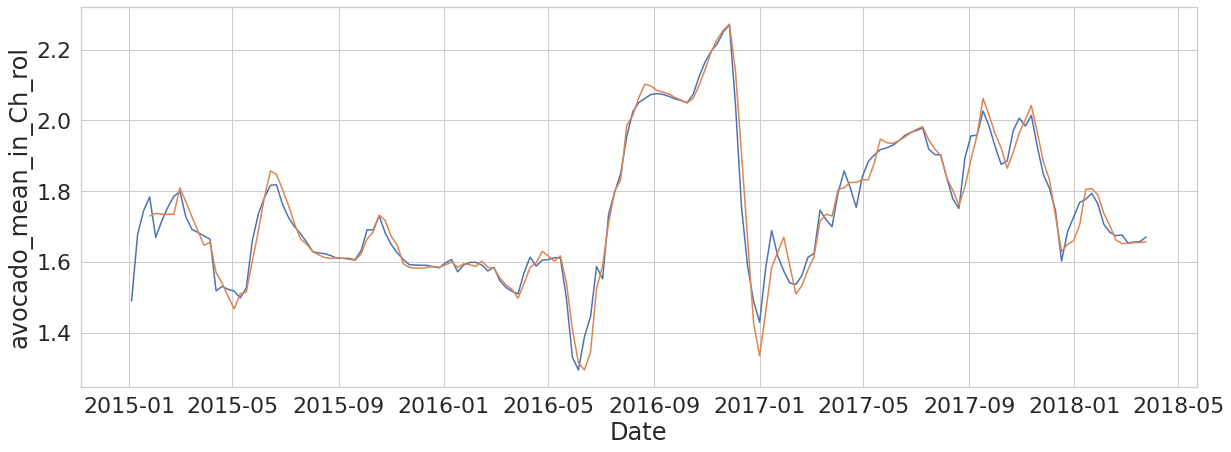

In [79]:
sns.lineplot(x=avocado_mean_in_Ch.avocado_mean_in_Ch_ewm.index, y = avocado_mean_in_Ch.avocado_mean_in_Ch_ewm)
sns.lineplot(x=avocado_mean_in_Ch.avocado_mean_in_Ch_rol.index, y = avocado_mean_in_Ch.avocado_mean_in_Ch_rol)

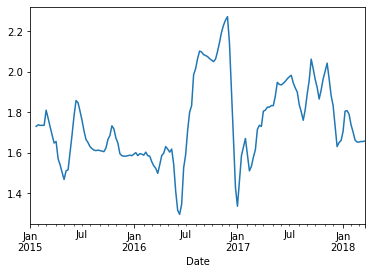

In [43]:
bx=avocado_mean_in_Ch_rol.plot()

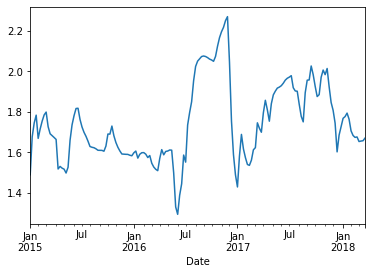

In [61]:
bx=avocado_mean_in_Ch_ewm.plot()

In [87]:
avocado_mean_in_Ch.loc['2016-08-21','avocado_mean_in_Ch_ewm'].round(3)

2.062

In [88]:
avocado_mean_in_Ch.loc['2016-08-21','avocado_mean_in_Ch_rol'].round(3)

2.102

In [89]:
avocado_mean_in_Ch.loc['2017-02-19','avocado_mean_in_Ch_ewm'].round(3)

1.562

In [90]:
avocado_mean_in_Ch.loc['2017-02-19','avocado_mean_in_Ch_rol'].round(3)

1.532

In [212]:
df = pd.read_csv('https://stepik.org/media/attachments/course/72204/delays.csv')

In [213]:
df.head()

client_id  company_id                        delay  revenue
0       2389        4240  -1 days -14:57:48.000000000   705436
1       7614        9544  -4 days -02:14:23.000000000   859266
2       2052        2427  -0 days -06:08:57.000000000   812416
3       9635        8054  -0 days -23:40:19.000000000   162312
4       8154        5503  -1 days -13:21:53.000000000   658844

In [214]:
df.delay = df.delay.str.replace('-','')

In [215]:
df.head()

client_id  company_id                      delay  revenue
0       2389        4240  1 days 14:57:48.000000000   705436
1       7614        9544  4 days 02:14:23.000000000   859266
2       2052        2427  0 days 06:08:57.000000000   812416
3       9635        8054  0 days 23:40:19.000000000   162312
4       8154        5503  1 days 13:21:53.000000000   658844

In [216]:
df.delay = pd.to_timedelta(df.delay)

In [217]:
df

client_id  company_id           delay  revenue
0         2389        4240 1 days 14:57:48   705436
1         7614        9544 4 days 02:14:23   859266
2         2052        2427 0 days 06:08:57   812416
3         9635        8054 0 days 23:40:19   162312
4         8154        5503 1 days 13:21:53   658844
..         ...         ...             ...      ...
259       5837        2617 0 days 05:32:08   602129
260       2384        2364 3 days 23:27:14   910660
261       5146        3331 1 days 15:22:34   401137
262       7203        5532 2 days 17:15:02   308979
263       3822        9882 1 days 15:50:29   877773

[264 rows x 4 columns]

In [218]:
delay_categorical = pd.cut(df.delay,3)

In [219]:
delay_categorical

0      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
1           (3 days 08:05:36.333333333, 4 days 23:51:14]
2      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
3      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
4      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
                             ...                        
259    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
260         (3 days 08:05:36.333333333, 4 days 23:51:14]
261    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
262    (1 days 16:19:58.666666666, 3 days 08:05:36.33...
263    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
Name: delay, Length: 264, dtype: category
Categories (3, interval[timedelta64[ns]]): [(0 days 00:27:11.587000, 1 days 16:19:58.66666... < (1 days 16:19:58.666666666, 3 days 08:05:36.33... < (3 days 08:05:36.333333333, 4 days 23:51:14]]

In [220]:
columns = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

In [221]:
cut_bins = pd.to_timedelta(['0d', '1d', '2d', '3d', '10d'])

In [222]:
df['delay_categorical'] = pd.cut(df['delay'], bins = cut_bins ,labels = columns )

In [223]:
df

client_id  company_id           delay  revenue delay_categorical
0         2389        4240 1 days 14:57:48   705436          1-2 days
1         7614        9544 4 days 02:14:23   859266  more than 3 days
2         2052        2427 0 days 06:08:57   812416   less than 1 day
3         9635        8054 0 days 23:40:19   162312   less than 1 day
4         8154        5503 1 days 13:21:53   658844          1-2 days
..         ...         ...             ...      ...               ...
259       5837        2617 0 days 05:32:08   602129   less than 1 day
260       2384        2364 3 days 23:27:14   910660  more than 3 days
261       5146        3331 1 days 15:22:34   401137          1-2 days
262       7203        5532 2 days 17:15:02   308979          2-3 days
263       3822        9882 1 days 15:50:29   877773          1-2 days

[264 rows x 5 columns]

In [224]:
df.delay_categorical.value_counts()

more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: delay_categorical, dtype: int64

In [225]:
er = df.groupby('delay_categorical', as_index = False).agg({'revenue' : 'count'})

In [226]:
er

delay_categorical  revenue
0   less than 1 day       59
1          1-2 days       51
2          2-3 days       47
3  more than 3 days      107

In [227]:
import plotly.express as px

In [228]:
px.bar(df.delay_categorical.value_counts())

In [229]:
fig = px.bar(er, x= er.delay_categorical, y = er.revenue)
fig.show()